In [1]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
images_train.shape

(50000, 32, 32, 3)

In [7]:
cls_train.shape

(50000,)

In [8]:
labels_train.shape

(50000, 10)

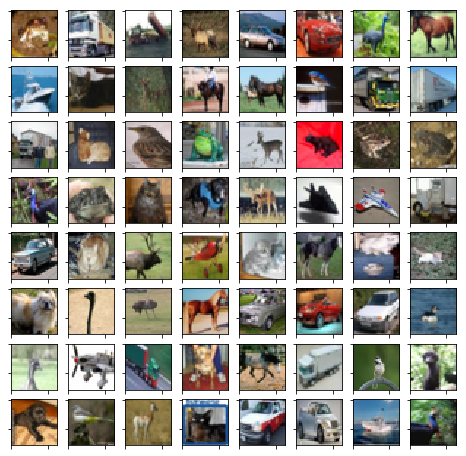

In [9]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    # subplot fn takes 3 params - total no. of rows n columns n position on whcih we want our image to get inserted 
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i],cmap=plt.cm.bone)
    ax.tick_params(which='both', labelbottom=False, labelleft=False)
plt.show()

In [10]:
x_train=images_train

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
y_train=cls_train

In [13]:
y_train.shape

(50000,)

In [14]:
x_test=images_test

In [15]:
images_test.shape

(10000, 32, 32, 3)

In [16]:
y_test=cls_test

In [17]:
cls_test.shape

(10000,)

In [18]:
x_train= x_train.reshape(50000,3072)
pca=PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
total=sum(pca.explained_variance_)
k=0
curr_var=0
while curr_var/total<0.99:
    curr_var+=pca.explained_variance_[k]
    k+=1
k

658

In [20]:
pca=PCA(n_components=k,whiten=True)
x_transform=pca.fit_transform(x_train)
x_transform.shape

(50000, 658)

In [21]:
x_approx=pca.inverse_transform(x_transform)
x_approx=x_approx.reshape(50000,32,32,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

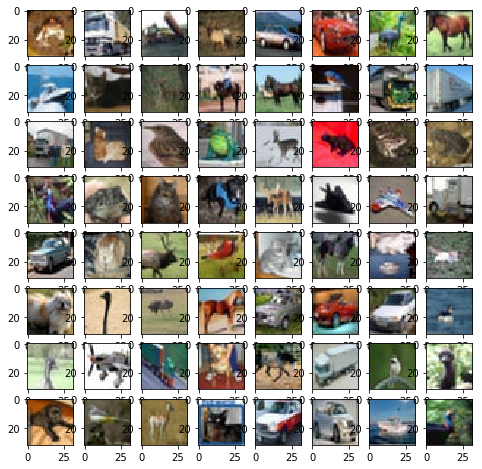

In [22]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    # subplot fn takes 3 params - total no. of rows n columns n position on whcih we want our image to get inserted 
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [23]:
eigenv=pca.components_
eigenv.shape

(658, 3072)

In [ ]:
x_test= x_test.reshape(10000,3072)
x_train_pca=x_transform
x_test_pca=pca.transform(x_test)

In [ ]:
y_train
x_train_pca

array([[-0.86027628,  0.58956777,  0.42062095, ..., -2.24308835,
        -0.87179429,  0.05840153],
       [ 0.11152023, -0.20522094,  1.68161846, ..., -0.0503263 ,
         0.60596285, -0.79459881],
       [ 1.03891411, -2.48917687, -0.77127413, ..., -0.52445817,
         1.16938086, -0.47259416],
       ...,
       [ 0.09506512, -2.45038108, -0.11033342, ...,  0.19033476,
         0.55093504,  2.2804462 ],
       [ 1.52781059, -0.72932918,  1.5590617 , ..., -2.02961359,
        -0.57403386,  1.82399243],
       [ 0.56349842, -0.25582611, -1.24529006, ...,  0.83921848,
         1.48023804, -0.75473717]])

In [ ]:
from sklearn import svm
clf = svm.SVC(C=7.5,cache_size=3000,gamma=0.01,kernel='rbf')
clf.fit(x_train_pca,y_train)
# y_pred=rf.predict(x_test_pca)
# print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))

In [ ]:
y_pred=clf.predict(x_test_pca)

In [ ]:
 Ypred=np.savetxt("predcifar--10.csv",[class_names[i] for i in y_pred],fmt='%s',delimiter=",")

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))